# **Salifort Motors Project**

## **Stage 1: Plan**
- The HR department at Salifort Motors wants to make some improvements to boost employee satisfaction levels at the company. The company has experienced high employee turnover, which is time consuming and a great financial setback. 
- The HR department wants to figure out what features contribute to employees wanting to leave. This will help the company to form incentives that will increase employee retention.
- The goal is to build a model that will predict whether or not an employee will leave the company.
- One of the main problems with the data is that it includes employees that left on their own and those who were fired.



### Imports and Data loading

In [1]:
# Import packages

# Packages for data manipulation
import pandas as pd 
import numpy as np

# Packages for data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt 

# Lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Packages for data modeling 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, \
confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle 

In [2]:
# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# First few rows of dataset
df0.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Exploration (Initial EDA and data cleaning)




In [3]:
# Basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
#Descriptive stats on the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.columns=df0.columns.str.lower()
df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe
df1.head(5)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Text(0.5, 1.0, 'Tenure Boxplot')

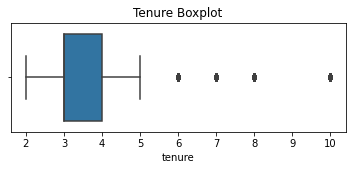

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,2))
fig=sns.boxplot(x='tenure', data=df1)
fig.set_title('Tenure Boxplot')



In [12]:
# Determine the number of rows containing outliers

# Find out the 75 and 25 percentiles of 'tenure'
q3_percentile75 = df1['tenure'].quantile(0.75)
print('Q3', q3_percentile75)

q1_percentile25 = df1['tenure'].quantile(0.25)
print('Q1',q1_percentile25)

# Calculate the iqr (inner quartile range)
iqr = q3_percentile75 - q1_percentile25
print('iqr',iqr)

# Find the lower and upper threshold 
lower_threshold = q1_percentile25 - (1.5 * iqr)
print('lower_threshold',lower_threshold)

upper_threshold = q3_percentile75 + (1.5 * iqr)
print('upper_threshold',upper_threshold)


outliers = df1[(df1['tenure'] < lower_threshold) | (df1['tenure'] > upper_threshold)]

print('Number of outliers', len(outliers))

Q3 4.0
Q1 3.0
iqr 1.0
lower_threshold 1.5
upper_threshold 5.5
Number of outliers 824


# Stage 2: Analyze 

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True)*100)


0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Plots to visualize relationships between variables in the data.

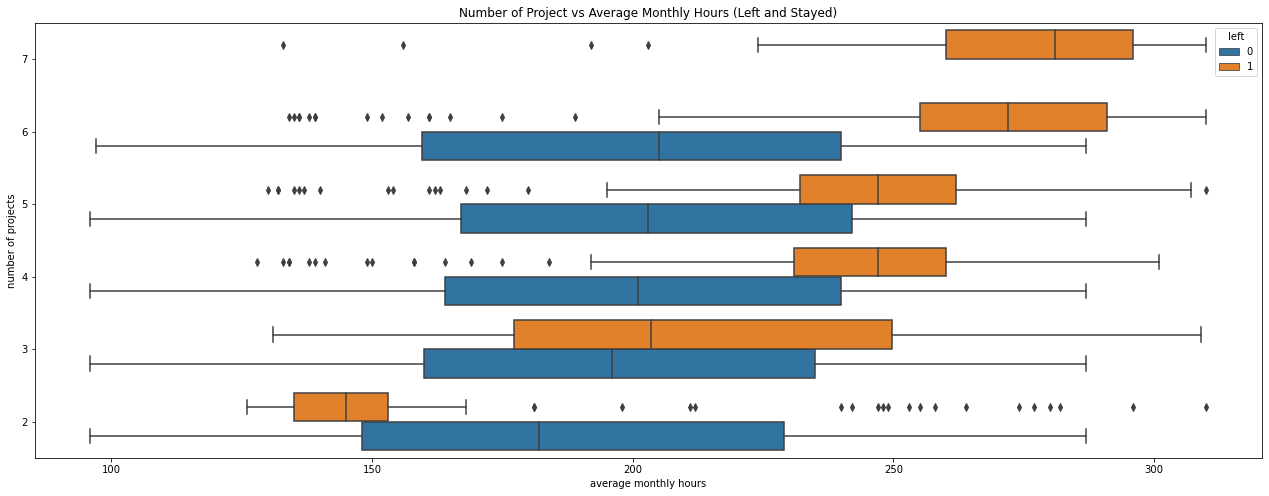

In [14]:
# Plot showing the relationship between 'number_project' vs 'average_monthly_hours', seperating those who stayed and those who left

fig,plt.figure(figsize=(22,8))

fig = sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h')
fig.set_title('Number of Project vs Average Monthly Hours (Left and Stayed)')
fig.invert_yaxis()
fig.set_ylabel('number of projects')
fig.set_xlabel('average monthly hours')


#Display plot 
plt.show()

Insights on above Boxplot
- From the plot we can see at the number of projects (4, 5, 6 and 7), with those who left, worked way more hours than those who stayed.
- It may be wise to figure out what the average amount of hours to work is a month. 8 (hours a day) * 5 (days a week) = 40(hours a week). There are about 52 weeks in a year, minus the 13 federal holidays, it will be ~50 weeks. 
- 50 * 40(hours a week)/12 =167 hrs/month
- We see at the top of the plot those who worked on 7 projects were only those who left. They also worked over ~250 hours, which is way above average.
- Most of the people who stayed average between 150 and 250 hours a month
- We also notice that the higher the number of projects gets, the more monthly hours worked.


In [17]:
# Value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

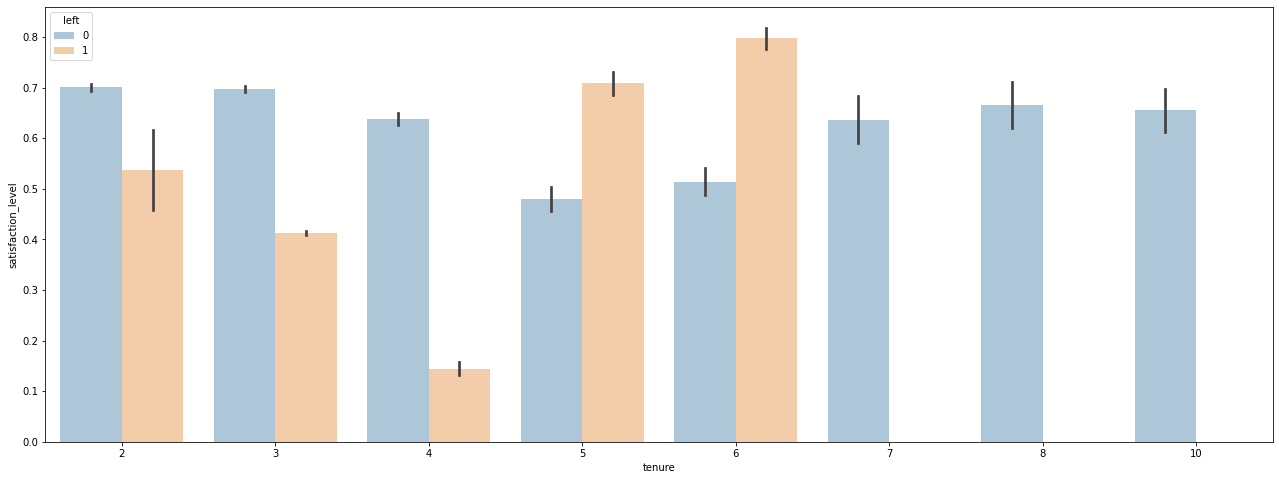

In [18]:
# Plot relationship between 'satisfaction_level' and 'tenure', seperating those who stayed and left

fig, plt.figure(figsize=(22,8))
fig = sns.barplot(data=df1 , x='tenure', y='satisfaction_level', hue='left', alpha=0.4)

plt.show()


Insights on above Barplot:
- We can see that no employee who left stayed longer than 6 years
- What is slightly confusing is that those who left that have been there 5 or 6 years have a higher satisfaction level


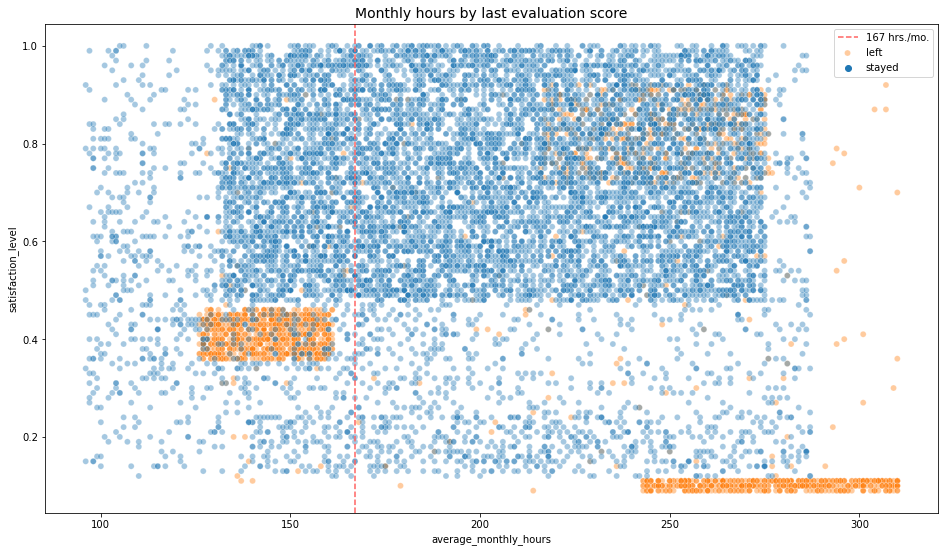

In [19]:
# Scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=167, color='#ff6361', label='167 hrs./mo.', ls='--')
plt.legend(labels=['167 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


Insights on above Scatterplot
- From just looking at the plot we can see that a huge portion of those who stayed worked between ~126-275 hrs/month.
- A huge portion of those who stayed also have a high satisfaction level between ~0.5-1.0
- Now those who left are distributed in three main groups. There is a big portion of those who left that worked between ~125-155 hrs/month. Which is lower than the average 167 hrs/month? With an estimated satisfaction level between ~0.38-0.46. If I were to guess, I would say these are employees who were fired. But since we do not know for sure, we will leave this information as is.
- The second portion of those who left, worked between ~240-325 hrs/month, which is way above the average of 167 hrs/month. They also have a pretty low satisfaction level of 0.1 and lower.
- The third portion of those who left worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9



Text(0.5, 1.0, 'Salary histogram by tenure greater than 6')

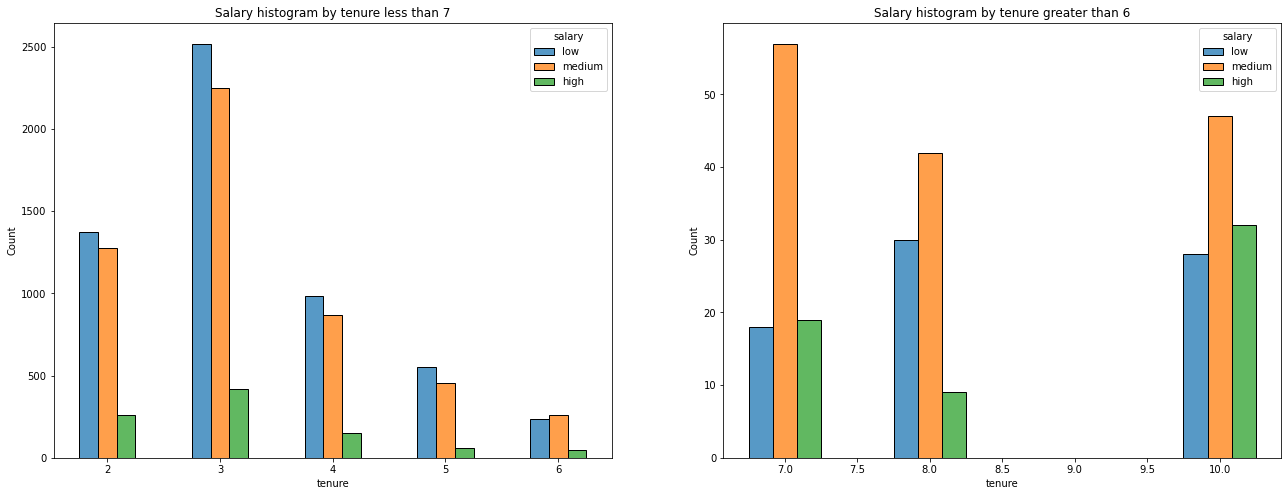

In [20]:
# Plot Scatterplot relationship 'tenure' vs 'salary'

fig, ax =plt.subplots(1, 2, figsize=(22,8))

fig = sns.histplot(data=df1[df1['tenure'] < 7], x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure less than 7')

fig = sns.histplot(data=df1[df1['tenure'] > 6], x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[1])
ax[1].set_title('Salary histogram by tenure greater than 6')

Insights on above Histogram plot:
- We can see that a large portion of the higher tenure employees are not receiving an equivalent high salary.
- At year 7, 8, 10 the larger portion of employees are receiving medium pay. 
- Year 8, the second highest portion of employees are receiving low pay and less than 10 employees receive high pay
- Year 10, which is the highest year an employee has stayed with the company within this survey. Has the highest portion of employees being paid a medium salary, then about 30 employees are paid a high salary, lastly around 27 employees are paid a low salary.
- We basically can see than tenure is not equivalent to a higher salary.


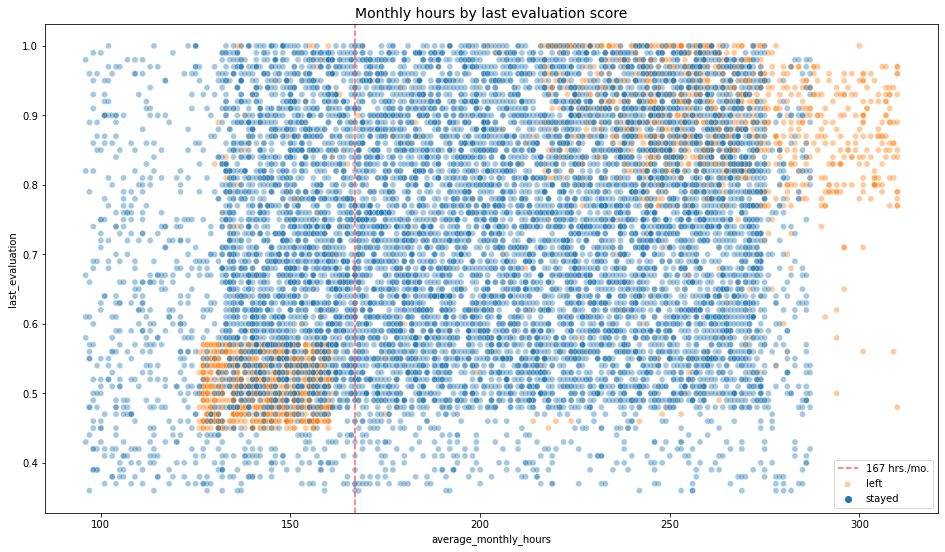

In [21]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`

fig, plt.figure(figsize=(16, 9))
fig =sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
fig.axvline(x=167, color='#ff6361', label='167 hrs./mo.', ls='--')
fig.legend(labels=['167 hrs./mo.', 'left', 'stayed'])
fig.set_title('Monthly hours by last evaluation score', fontsize='14');


Insights on above Scatterplot:

- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the monthly average of 167 hours with lower evaluation scores. 
- There seems to be a high correlation between hours worked and evaluation score with the employees that left.
- Most of the employees in this company work well over 167 hours per month.


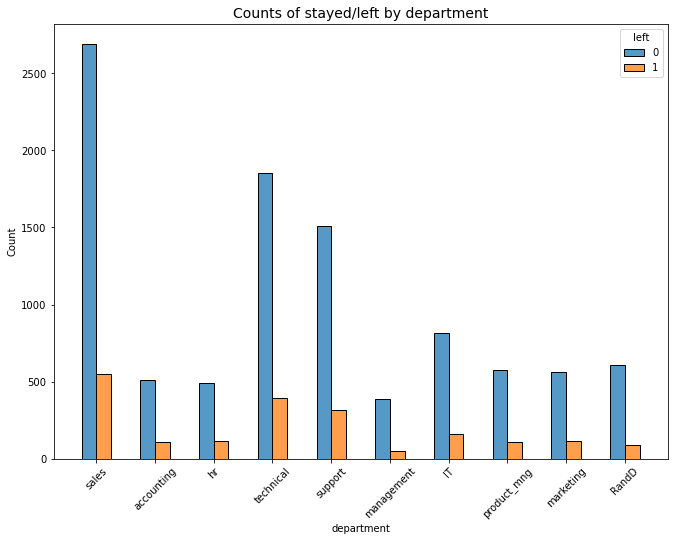

In [22]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
fig, plt.figure(figsize=(11,8))
fig =sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
fig,plt.xticks(rotation='45')
fig.set_title('Counts of stayed/left by department', fontsize=14);

Insights on above Histogram Plot:
- We see that the top 3 departments that have the most employees that left  are Sales, Technical and Support.


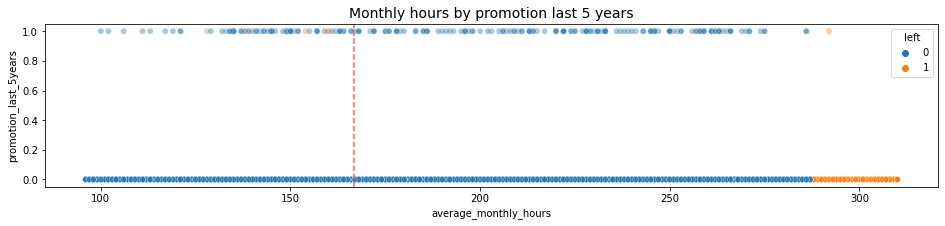

In [23]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`

fig, plt.figure(figsize=(16, 3))
fig =sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
fig.axvline(x=166.67, color='#ff6361', ls='--')
fig.set_title('Monthly hours by promotion last 5 years', fontsize='14');


Insights on above Scatterplot:
- In this plot we see that very few employees who were promoted in the last five years left.
- We also see very few employees who worked the most hours were promoted.
- Most of the employees that had left were working long hours.


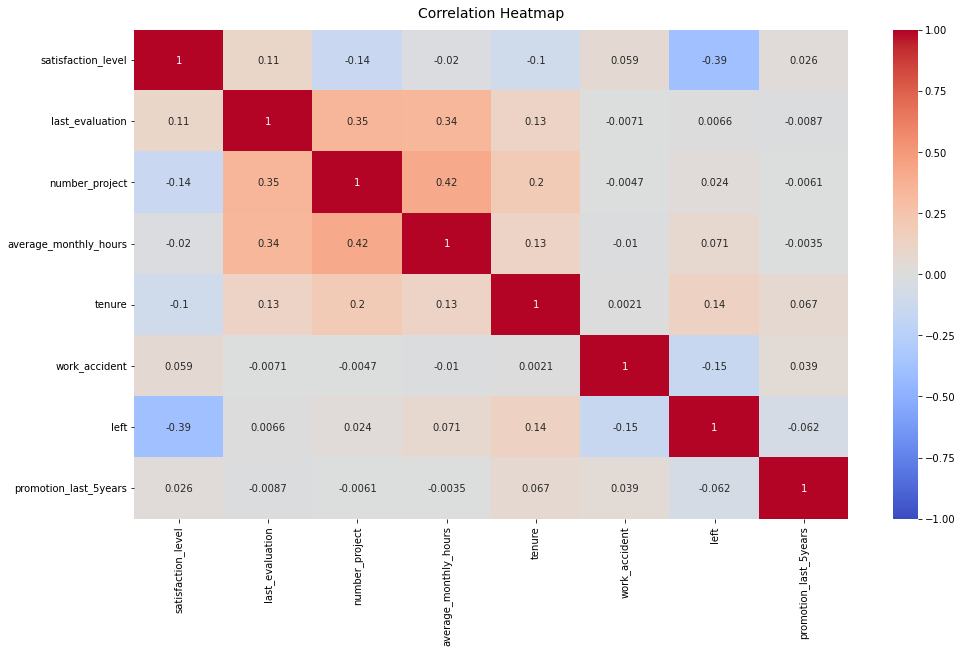

In [24]:
# Plot a correlation heatmap

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Insights on above Correlation Map:
- We see that monthly hours, last evaluation and number of projects all have some positive correlation with each other. 
- We can also see that satisfaction level and work accident have a negative correlation with employees who left.

### Overall Insights

- We see from the plots that employees leave because of having to many projects, working to many hours, for some low saticifaction and no promotion.
- This all can be due to poor managment 

# Stage 3: Construct 



###  Models most appropriate for this task.

The most appropriate model would be
1. A tree based model 
2. A binary logistic Regression model

## Modeling Type: Random Forest and XGBoost

In [25]:
# Check feauture data types
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


#### Variable Encoding

Dummying features

For column 'salary':

low -> '0'
medium -> '1'
high -> '2'

In [26]:
# Encode the column salary
df2 = df1.copy()

df2['salary2'] = df2['salary'].replace({'low': 0,
                                     'medium': 1,
                                     'high': 2})
df2[['salary', 'salary2']].head(5)

,salary,salary2
0,low,0
1,medium,1
2,medium,1
3,low,0
4,low,0


In [27]:
df2 = df2.drop('salary', axis=1)
df2.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary2
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [28]:
# Dummy Encode the column 'department'

df2 = pd.get_dummies(df2, drop_first=True)

df2.tail(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary2,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
11990,0.49,0.49,4,212,7,0,0,0,1,0,0,0,0,0,1,0,0,0
11991,0.60,0.53,2,235,7,0,0,0,1,0,0,0,0,0,0,0,0,0
11992,0.62,0.85,3,237,3,1,0,0,1,0,0,0,0,0,0,0,0,0
11993,0.64,0.50,4,253,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11994,0.22,0.94,3,193,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11995,0.90,0.55,3,259,10,1,0,1,2,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,1,0,0,0,0
11999,0.50,0.73,4,180,3,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Feature Engineering

In [29]:
# Create a column 'Overworked', shows which employees worked greater than 167 hrs/month

df2['Overworked'] = np.where((df2['average_monthly_hours'] > 167), 1,0).astype(int)
df2.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary2,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,Overworked
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
# Find out how many employees were over worked
df2['Overworked'].value_counts()

1    8197
0    3794
Name: Overworked, dtype: int64

#### Evaluation metric

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary2                 11991 non-null  int64  
 9   department_RandD        11991 non-null  uint8  
 10  department_accounting   11991 non-null  uint8  
 11  department_hr           11991 non-null  uint8  
 12  department_management   11991 non-null  uint8  
 13  department_marketing    11991 non-null  uint8  
 14  department_product_mng  11991 non-null

In [32]:
# Check class balance 
df2['left'].value_counts(normalize=True)*100

0    83.39588
1    16.60412
Name: left, dtype: float64

Approximately 17% of employees left. The dataset is unbalanced, but it is not to extreme. So we wil leave it as is.

#### **Split the data**

Now we will split the data into features/target variable and training/validation/test sets.

We will split the data 80/20 into a training set and a test set. 

Then we will split the training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets.

In [33]:
# Split Data

# Isolate y
y = df2['left']

# Isolate X
X = df2.drop(columns=['left', 'average_monthly_hours'], axis=1)

# Split into train and test sets
X_tr,X_test,y_tr,y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

# Split into train and validation sets
X_train,X_val,y_train,y_val = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.25, random_state=42)

Verify the number of samples in the partitioned data.

In [34]:
X_tr.shape, X_val.shape, X_test.shape, y_tr.shape, y_val.shape, y_test.shape

((9592, 17), (2398, 17), (2399, 17), (9592,), (2398,), (2399,))

### **Modeling**

#### **Random forest**

The hyperparameters we will tune are 

 - 'max_depth'
 - 'max_features'
 - 'max_samples'
 - 'min_samples_leaf'
 - 'min_samples_split'
 - 'n_estimators'

In [35]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,6,8,None],
            'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75, 100, 300],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4 ,refit='f1')

In [36]:
%%time
rf_cv.fit(X_train,y_train)

CPU times: user 2min 28s, sys: 292 ms, total: 2min 29s
Wall time: 2min 29s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

Examine the best average score across all the validation folds.

In [37]:
# Examine best score
rf_cv.best_score_

0.9405372464523061

Examine the best combination of hyperparameters.

In [38]:
# Examine best hyperparameters combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [39]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    
  # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict ={'precision' : 'mean_test_precision',
               'recall': 'mean_test_recall',
               'f1': 'mean_test_f1',
               'accuracy': 'mean_test_accuracy'}
    
  # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

  # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )
    
    return table 


In [40]:
results = make_results('RF CV', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.951434,0.914637,0.932434,0.978037


All score are pretty high and performing well. The F1 score is 93% which well above average. Now we will build a XGBoost model to see if the score will improve.

XGBoost

The hyperparameters we will tune are:

- 'max_depth'
- 'min_child_weight'
- 'learning_rate'
- 'n_estimators'

In [41]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
xgb_params = {'max_depth': [4,6,8,None],
             'min_child_weight':[1,5,15],
             'learning_rate':[0.01, 0.1],
             'n_estimators':[75, 100, 300]}

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, xgb_params, scoring=scoring, refit='f1')

In [42]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: user 8min 29s, sys: 3.63 s, total: 8min 32s
Wall time: 4min 18s


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated'

Get the best score from this model.

In [43]:
# Examine best score
xgb_cv.best_score_

0.9378771227132685

Get the best parameters for this model.

In [44]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 100}

In [45]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB CV', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.951434,0.914637,0.932434,0.978037
0,XGB CV,0.957075,0.912134,0.933833,0.978593


Both models performed pretty well overall. Except, we see that the XGBoost model performed better than the Random Forest model slightly. All the scores (precision, recall, F1 and accuracy) are pretty much the same. The XGBoost model's F1 score performed about 0.150% better than the Random Forest model. 

### **Model selection (Champion Model)**

Now, we will use the best Random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model to use on the test set

### Random Forest

In [46]:
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [47]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [48]:
rf_val_results = get_test_scores('RF val',rf_val_preds, y_val)

results = pd.concat([results, rf_val_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.951434,0.914637,0.932434,0.978037
0,XGB CV,0.957075,0.912134,0.933833,0.978593
0,RF val,0.983827,0.917085,0.949285,0.983736


We see that the scores are higher than the training data, but only slightly. This lets us know that the model did not overfit the training data.

### XGBoost 

In [49]:
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

In [50]:
xgb_val_results = get_test_scores('XGB val',xgb_val_preds, y_val)

results = pd.concat([results, xgb_val_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.951434,0.914637,0.932434,0.978037
0,XGB CV,0.957075,0.912134,0.933833,0.978593
0,RF val,0.983827,0.917085,0.949285,0.983736
0,XGB val,0.983827,0.917085,0.949285,0.983736


The validation scores for the XGBoost and Random Forest model performed slightly better than the training data scores. This lets us know that the model did not overfit the data.

# Stage 4: Execute

### Use champion/winning model to predict on test data

Now, we will use the champion model to predict on the test dataset. This will give us the final indication of how we should expect the model to perform on new future data. From the validation results we see that both models performed the exact same. So going forward we will use the XGBoost model that slightly outperformed the Random Forest Model with the training data.

In [51]:
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)


In [52]:
xgb_test_results = get_test_scores('XGB test',xgb_test_preds, y_test)

results = pd.concat([results, xgb_test_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.951434,0.914637,0.932434,0.978037
0,XGB CV,0.957075,0.912134,0.933833,0.978593
0,RF val,0.983827,0.917085,0.949285,0.983736
0,XGB val,0.983827,0.917085,0.949285,0.983736
0,XGB test,0.978723,0.924623,0.950904,0.984160


The test data score are pretty much the same as the validation score. The scores dropped very slightly. There are no huge discrepancy between validation and test scores.

### **Confusion matrix**

Plot a confusion matrix of the champion model's predictions on the test data. The confusion matrix will further asses the performance of the model

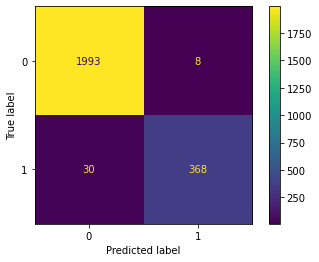

In [53]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels = xgb_cv.classes_)

# Plot confusion matrix
disp= ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =xgb_cv.classes_)
disp.plot(values_format='')

plt.show()

- Upper Left quadrant (True Neg) Number of correctly predicted employees that 'stayed' (1993)
- Upper Right quadrant (False Pos) Number of incorrectly predicted employees that 'left' but actually 'stayed' (8)
- Lower Left quadrant (False Neg) Number of incorrectly predicted employees that 'stayed' but actually 'left' (30)
- Lower Right quadrant (True Pos) Number of correctly predicted employees that 'left' (368)
- The model correctly identified ~94% of employees that 'left'. 
- The model identified 3x as many False Negatives than it did False Positives

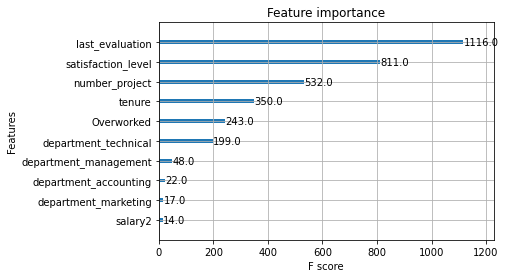

In [54]:
plot_importance(xgb_cv.best_estimator_)

- The feauture importance plot shows that the top five features that help predict if an employee will leave are (last_evaluation, satisfaction_level, number_project, tenure, and overworked)

### Modeling Type: Logistic Regression

- Another possible model we could have used is a Logistic Regression Model. So here we will build a Logistic Regression model
- Some things we want to keep in mind while building the Logistic Regression Model are the assumptions:

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

Since Logistic Regression is sensitive to outliers we will go ahead and take care of those

In [55]:
df3 =df2[(df2['tenure'] >= lower_threshold) & (df2['tenure'] <= upper_threshold)]

df3.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary2,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,Overworked
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,1,0,0,1
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
10,0.45,0.54,2,135,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
# Isolate the target and feature variables

y = df3['left']

X = df3.drop(columns=['left', 'average_monthly_hours'])

 Split the Data

In [57]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Construct the Regression Model

In [58]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500)

log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Make predictions on the test set

In [59]:
# Use the logistic regression medel to make predictions on the test set 

y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model. 

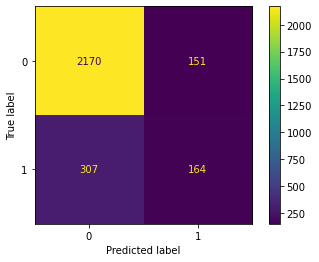

In [60]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The Confusion Matrix plot shows:
- Upper Left quadrent (True Neg) Number of correctly predicted employees that 'stayed' (2170)
- Upper Right quadrent (False Pos) Number of incorrectly predicted employees that 'left' but actually 'stayed' (151)
- Lower Left quadrent (False Neg) Number of incorrectly predicted employees that 'stayed' but actually 'left' (307)
- Lower Right quadrent (True Pos) Number of correctly predicted employees that 'left' (164)
- The model correctly identified ~34.82% of employees that 'left'.
- The model identified 2x as many False Negatives than it did False Positives

In [61]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.88      0.93      0.90      2321
    Predicted would leave       0.52      0.35      0.42       471

                 accuracy                           0.84      2792
                macro avg       0.70      0.64      0.66      2792
             weighted avg       0.82      0.84      0.82      2792



The classification report above shows that the logistic regression model achieved a precision of 82%, recall of 84%, f1-score of 82% (all weighted averages), and accuracy of 84%. These scores are good but much lower than the tree based models.

## Conclusion, Recommendations & Next Steps



### Summary of Model Results:
1. Both models performed pretty much the same. So we chose the XGBoost Model as the best model predictor out of the two. The recall score was ~92%.

2. The model correctly identified ~94% of employees that 'left' the company.

3. The top five features that help predict if an employee will leave are (last evaluation, satisfaction level,   number project, tenure, and overworked).

4. By the models it is confirmed that many of the employees are overworked.

### Employee Retention Recommendations:
1. As employee tenure goes up, so should their salary. From the plot we saw that even at a 10 year tenure many of the employees were getting paid a medium to low salary.

2. There needs to be a better scale for evaluation. Most of the employees that left were overworked and had high evaluations. This tells us that the company by default gave high evaluation score to those who were being overworked. 

3. From what we saw from the plot, many of the employees that were overworked also were involved in multiply projects. There should be better management on dividing projects up between employees. If an employee is going to take on more projects and more hours there should be an incentive of higher pay or higher overtime pay. 

### Next Steps:
1. It was stated that some of the data was also taken from employees who were fired. Maybe having a sample that did not include those employees, could return a different model outcome. So a next step could be to acquire a sample from employees that are not in line to possibly being fired.

2. I believe it may be wise to conduct a survey/building a predictive model on each individual department. So we can see how each department stacks up. From the plot we saw that the departments Sales, Technical and Support had the most employees that left the company. Maybe looking more into those departments individually can help learn about the treatment of employees.

3. I think having a discussion or taking a survey on company culture would be beneficial. Maybe having questions about employee benefits, work life balance or even work culture would be beneficial. 
